In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('zomato.csv', encoding='latin-1')

print(df.columns)
print(df.info())  # Types of columns 
print(df.describe())  # 5 number summary


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             95

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
['Cuisines']


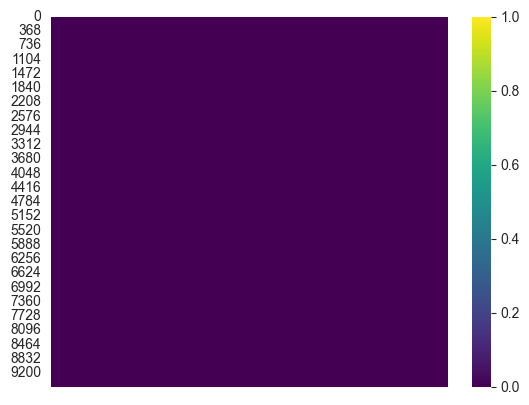

In [2]:

# IN DATA ANALYSIS WHAT ALL THINGS WE DO
# MISSING VALUES  


# EXPLORE ABOUT THE NUMERICAL VALUES
# EXPLORE ABOUT CATEGORICAL VARIABLE
# FINDING RELATIONSHIP BETWEEN FEATURES

print(df.isnull().sum())  # Finding number of null values in dataset fields

null_vals_holder = [features for features in df.columns if df[features].isnull().sum() > 0]
print(null_vals_holder)

sns.heatmap(df.isnull(), xticklabels=False, cbar=True, cmap='viridis')
plt.show()


Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


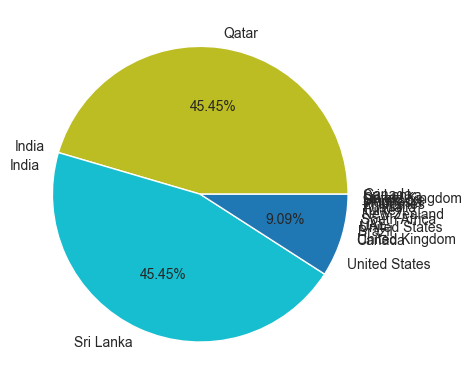

In [3]:

df_country = pd.read_excel('Country-Code.xlsx')
holder = pd.merge(df, df_country, on='Country Code', how='left')  # Combine two datasets

print(holder.Country.value_counts())
country_names = holder.Country.value_counts().index  # Storing names of countries
country_values = holder.Country.value_counts().values  # Creating arrays of values

# Pie chart
plt.pie(country_values, labels=country_names)
# Top three countries that use Zomato
plt.pie(country_values[:3], labels=country_names[:3])
# Least three countries
plt.pie(country_values[12:15], labels=country_names[12:15], autopct='%1.2f%%')
plt.show()


/var/folders/9n/s9t73f3s6lj4xm2bpssc4mw00000gn/T/ipykernel_5440/1201772554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color", data=rating, palette=['silver', 'red', 'orange', 'yellow', 'green', 'green'])


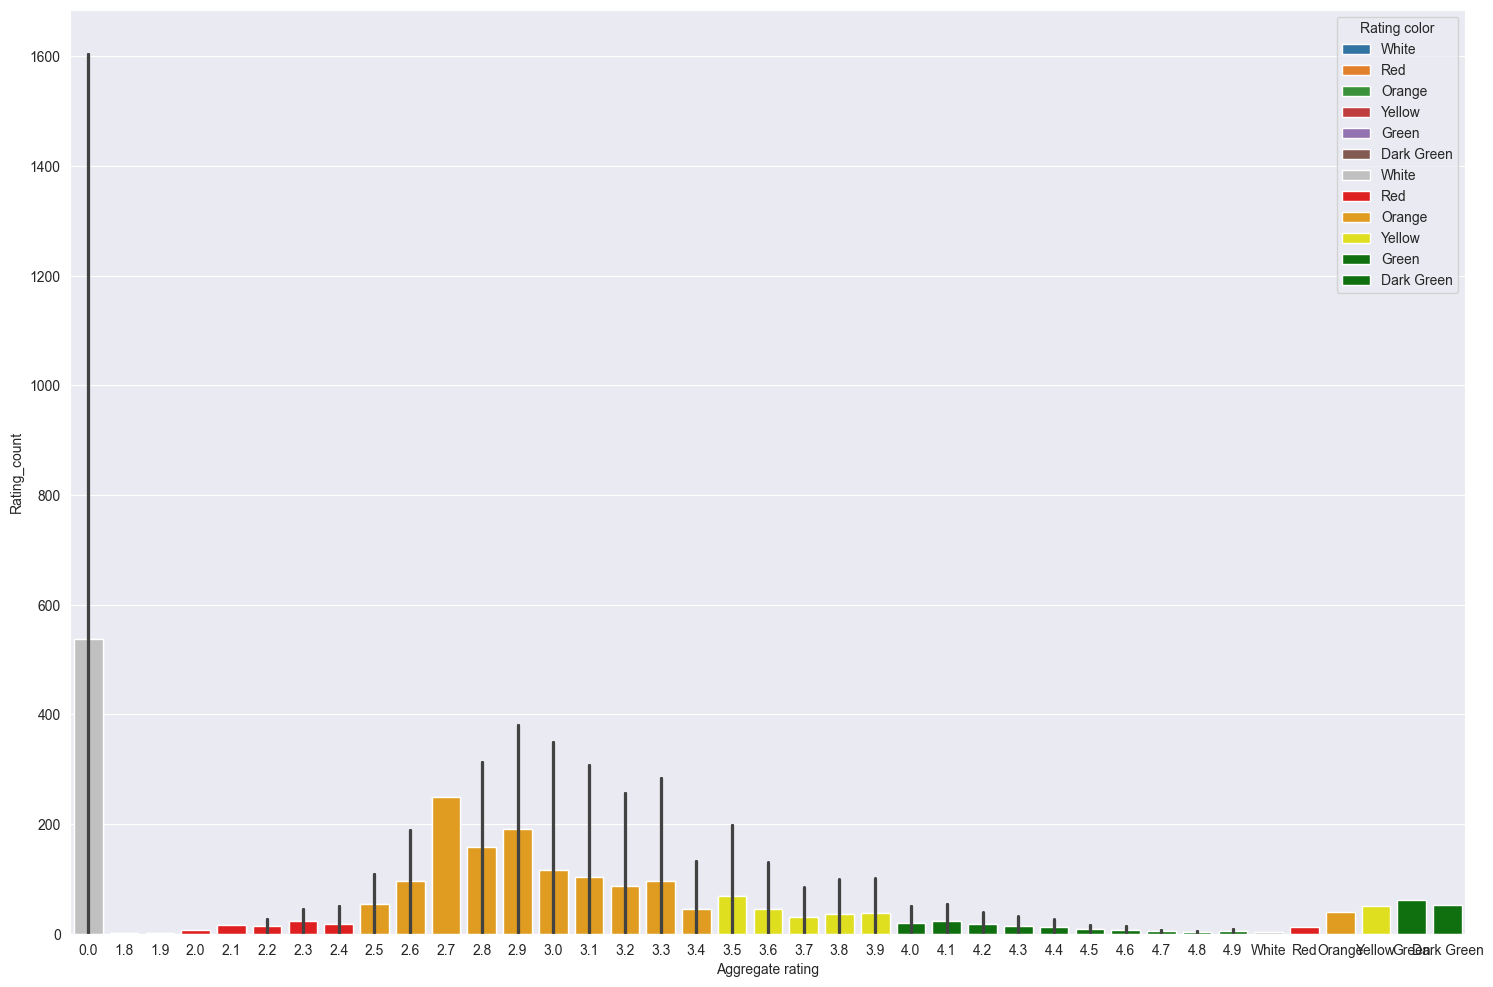

In [4]:

rating = holder.groupby(['Aggregate rating', 'Country Code', 'Rating color', 'Rating text']).size().reset_index(name='Rating_count')
plt.rcParams['figure.figsize'] = (18, 12)
sns.barplot(x="Aggregate rating", y="Rating_count", hue='Rating color', data=rating)
sns.barplot(x="Aggregate rating", y="Rating_count", hue='Rating color', data=rating, palette=['silver', 'red', 'orange', 'yellow', 'green', 'green'])
sns.countplot(x="Rating color", data=rating, palette=['silver', 'red', 'orange', 'yellow', 'green', 'green'])
plt.show()


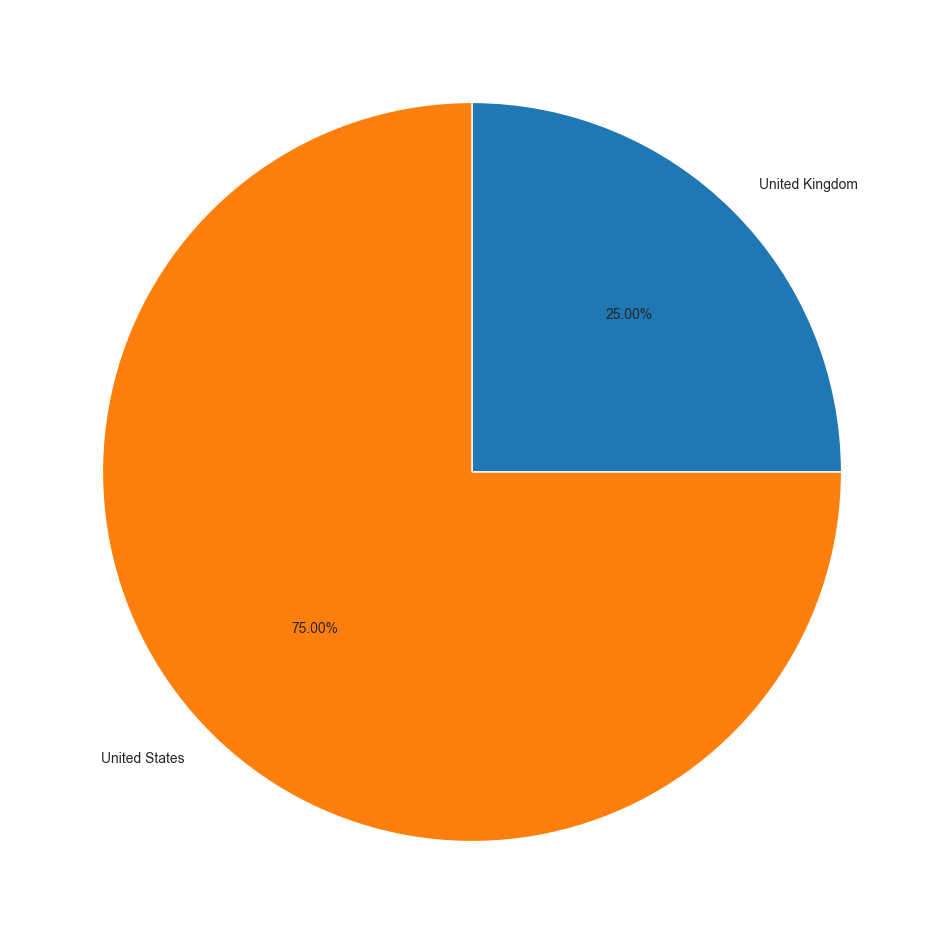

          Country  ratings
0          Brazil        5
1           India     2139
2  United Kingdom        1
3   United States        3


In [5]:

nullrates = holder[holder['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0: 'ratings'})
plt.pie(nullrates['ratings'][2:], labels=nullrates['Country'][2:], autopct='%1.2f%%')
plt.show()
print(nullrates)


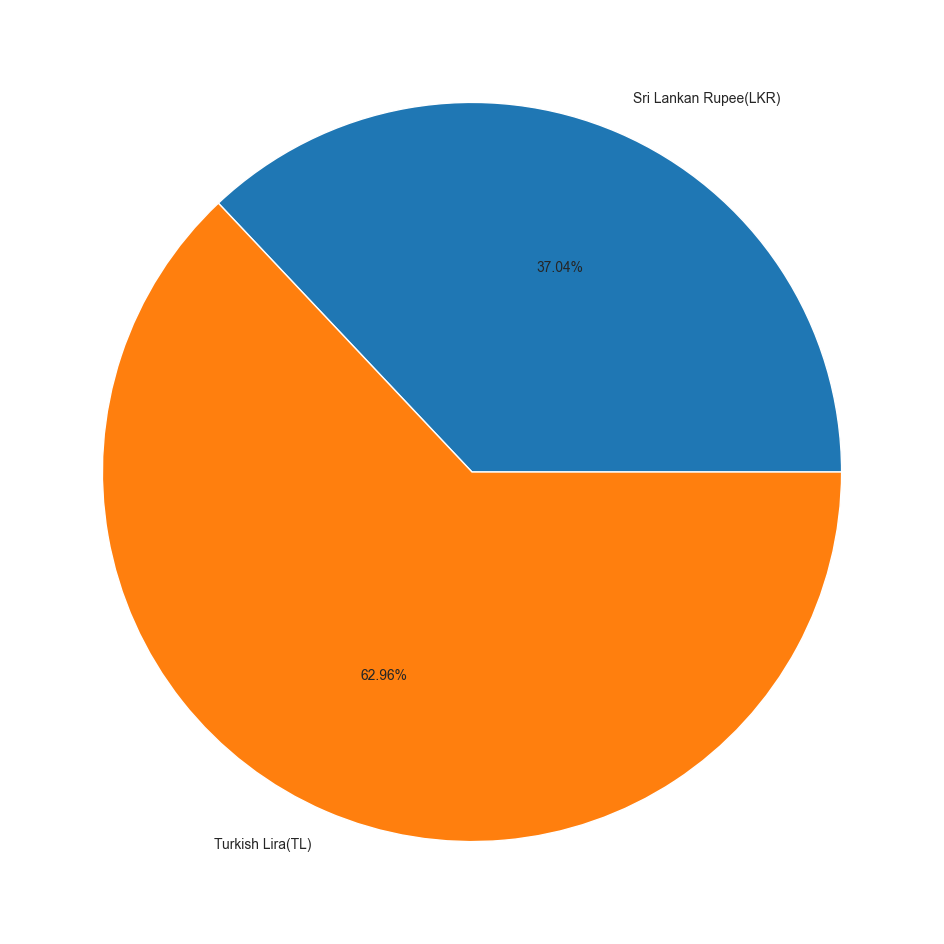

           Country                Currency  used
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434


In [6]:

# Find out which currency is used in every country
notes = holder[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index().rename(columns={0: 'used'})
plt.pie(notes['used'][10:12], labels=notes['Currency'][10:12], autopct='%1.2f%%')
plt.show()
print(notes)


  Country     0
0   India  2423
1     UAE    28


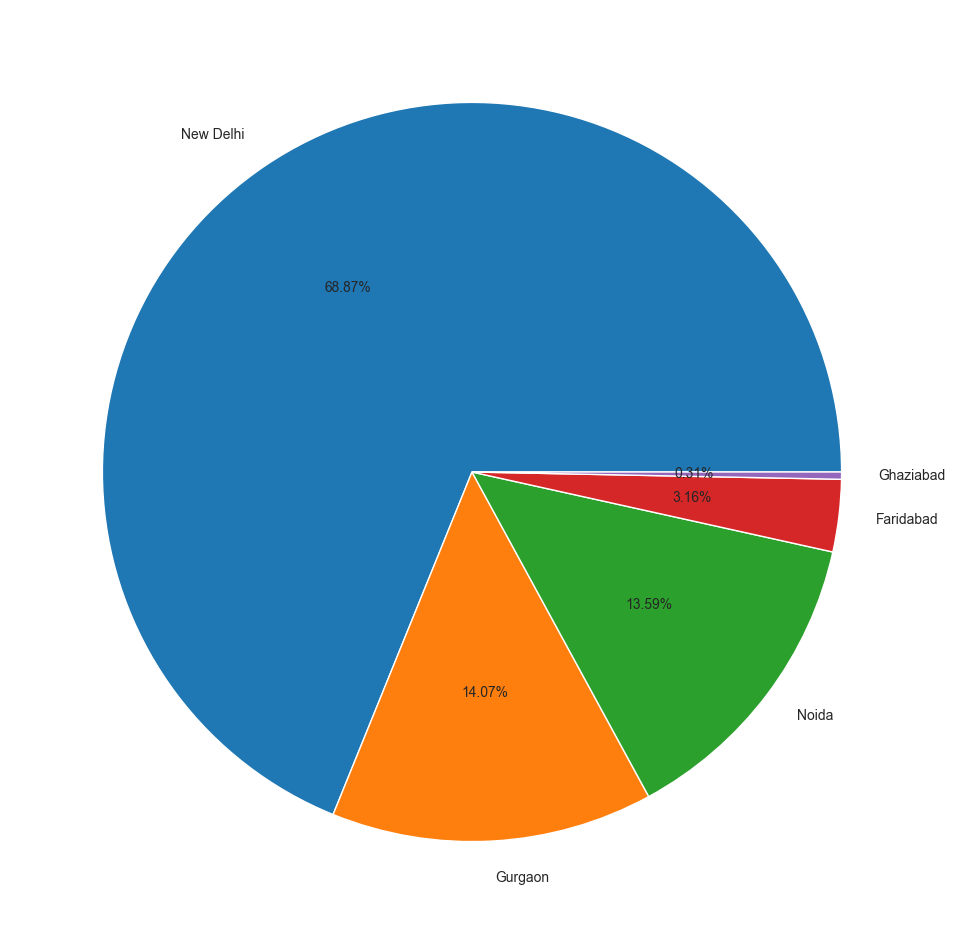

In [7]:

onlined = holder[holder['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index()
print(onlined)

cities_val = holder.City.value_counts().values
city_labels = holder.City.value_counts().index
plt.pie(cities_val[:5], labels=city_labels[:5], autopct='%1.2f%%')
plt.show()


/var/folders/9n/s9t73f3s6lj4xm2bpssc4mw00000gn/T/ipykernel_5440/3845638376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='top_10', y='Cuisines', data=cuisines_top_10, palette=['green', 'red'])
/var/folders/9n/s9t73f3s6lj4xm2bpssc4mw00000gn/T/ipykernel_5440/3845638376.py:4: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='top_10', y='Cuisines', data=cuisines_top_10, palette=['green', 'red'])


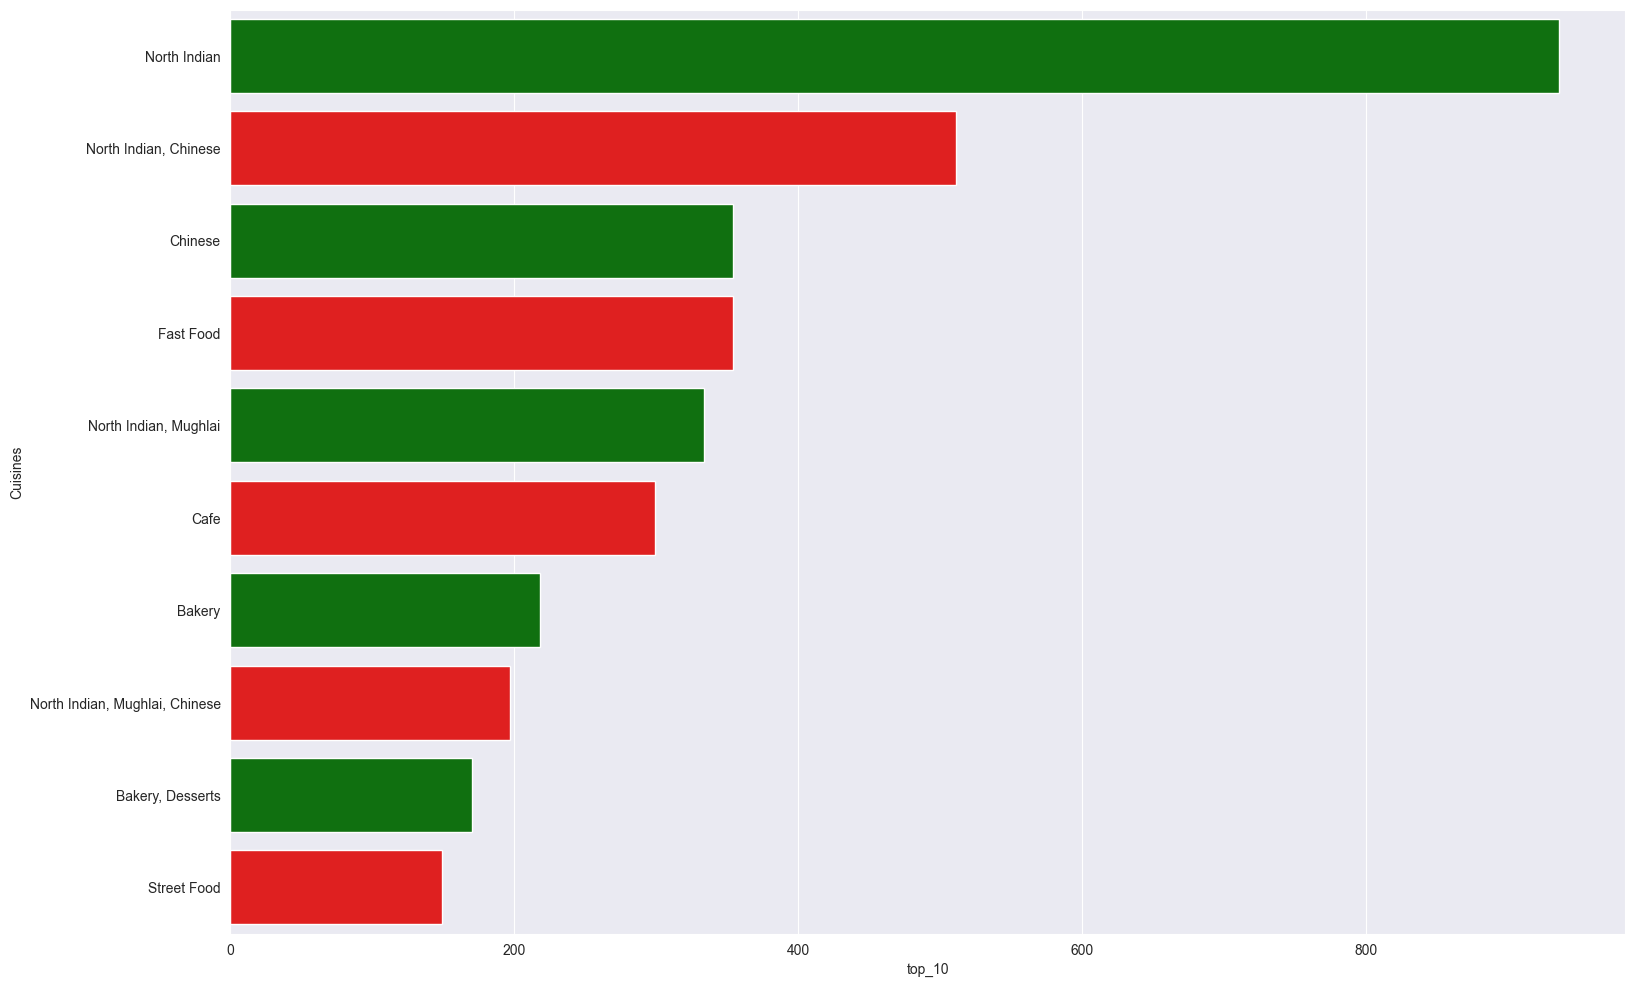

                            Cuisines  top_10
1306                    North Indian     936
1329           North Indian, Chinese     511
497                          Chinese     354
828                        Fast Food     354
1514           North Indian, Mughlai     334
331                             Cafe     299
177                           Bakery     218
1520  North Indian, Mughlai, Chinese     197
186                 Bakery, Desserts     170
1749                     Street Food     149
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Add

In [8]:

cuisines = holder.groupby('Cuisines').size().reset_index().rename(columns={0: 'top_10'})
cuisines_sorted = cuisines.sort_values(by='top_10', ascending=False)
cuisines_top_10 = cuisines_sorted.head(10)
sns.barplot(x='top_10', y='Cuisines', data=cuisines_top_10, palette=['green', 'red'])
plt.show()
print(cuisines_top_10)

print(df.head())
